In [20]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
climatology_path = '/mnt/qb/goswami/data/era5/weatherbench2/1990-2019_6h_1440x721.zarr'
clim = xr.open_zarr(climatology_path)

In [22]:
obs = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr")

/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [26]:
sfno = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/sfno/forecast_lead_time=112_time=2016-2018-shuffled.zarr")

In [29]:
def data(i):
    path = [
        [
            '/mnt/qb/work2/goswami0/gkd965/checkpoints/solar-spaceship-111-sID{0005}/forecast_lead_time=84_time=2016-2018-shuffled.zarr',
            '/mnt/qb/work2/goswami0/gkd965/checkpoints/solar-spaceship-111-sID{0005}/eval/forecast_lead_time=84_time=2016-2018-shuffled_evaltest.nc'
        ],[
            '/mnt/qb/work2/goswami0/gkd965/checkpoints/jolly-blaze-113-sID{13578}/forecast_lead_time=112_time=2016-2018-shuffled.zarr',
            '/mnt/qb/work2/goswami0/gkd965/checkpoints/jolly-blaze-113-sID{13578}/eval/forecast_lead_time=112_time=2016-2018-shuffled_eval.nc'
        ]
    ]
    forecast_path, evals_path = path[i]
    forecast = xr.open_zarr(forecast_path)
    evals  = xr.open_dataset(evals_path)
    return forecast, evals
            

In [30]:
forecast, evals = data(1)

In [34]:
forecast

<xarray.Dataset> Size: 265GB
Dimensions:                    (prediction_timedelta: 5, time: 180,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 40B 0 d...
  * time                       (time) datetime64[ns] 1kB 2016-01-01T06:00:00 ...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    geopotential               (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    mean_sea_level_pressure    (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    relative_humidity          (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    surface_pressure           (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    temperature                (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    total_column_water_vapour  (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    u_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    v_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>

In [31]:
evals

<xarray.Dataset> Size: 1kB
Dimensions:                    (lead_time: 5, level: 4, metric: 3)
Coordinates:
  * lead_time                  (lead_time) timedelta64[ns] 40B 0 days 06:00:0...
  * level                      (level) int32 16B 300 850 925 1000
  * metric                     (metric) object 24B 'acc' 'bias' 'mse'
Data variables:
    geopotential               (metric, lead_time, level) float32 240B ...
    relative_humidity          (metric, lead_time, level) float32 240B ...
    temperature                (metric, lead_time, level) float32 240B ...
    v_component_of_wind        (metric, lead_time, level) float32 240B ...
    2m_temperature             (metric, lead_time) float32 60B ...
    total_column_water_vapour  (metric, lead_time) float32 60B ...
    mean_sea_level_pressure    (metric, lead_time) float32 60B ...

In [33]:
evals['2m_temperature'].sel(metric='mse').to_numpy()

array([82893.93 , 82852.   , 82857.125, 82862.79 , 82867.945],
      dtype=float32)

In [35]:
forecast['2m_temperature'].isel(prediction_timedelta=0,time=0).to_numpy()

array([[-0.81697243, -0.81697243, -0.81697243, ..., -0.81697243,
        -0.81697243, -0.81697243],
       [-0.79337794, -0.79294103, -0.7933525 , ..., -0.7942226 ,
        -0.79409003, -0.7935489 ],
       [-0.78844845, -0.7882945 , -0.7882586 , ..., -0.7898249 ,
        -0.78888774, -0.78906894],
       ...,
       [-1.2206126 , -1.2206371 , -1.2201658 , ..., -1.2203125 ,
        -1.2204665 , -1.2203162 ],
       [-1.2011966 , -1.2014477 , -1.2014947 , ..., -1.2015593 ,
        -1.2015358 , -1.2012155 ],
       [-1.2085196 , -1.2085196 , -1.2085196 , ..., -1.2085196 ,
        -1.2085196 , -1.2085196 ]], dtype=float32)

In [18]:
fn = f['2m_temperature'].isel(time=0,prediction_timedelta=0).to_numpy()

In [12]:
f.lead_time.to_numpy().astype('timedelta64[h]')

array([  6, 168, 336, 504], dtype='timedelta64[h]')

In [13]:
f['relative_humidity'].sel(metric='mse').to_numpy()

array([[ 2.0264692,  6.5869803, 13.890411 , 16.213217 ],
       [ 2.2185156,  6.9851036, 11.318614 , 10.151982 ],
       [ 2.260561 ,  7.6156135, 12.0974045, 10.889194 ],
       [ 2.3030612,  7.8895454, 12.572457 , 11.185738 ]], dtype=float32)

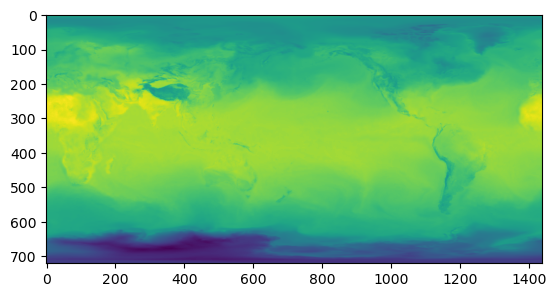

In [21]:
plt.imshow(fn)